In [163]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn.dummy import DummyClassifier
from keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score

In [108]:
data = pd.read_csv("/Users/gustavobrandao/Downloads/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [60]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [315]:
x = data.drop("Class",axis=1)
y = data[["Class"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [316]:
#Perceptron with L2 regularizer made only with numpy
class perceptron:
    def __init__(self,learning_rate,epoches,l2_lambda=0.1):
        self.learning_rate = learning_rate
        self.epoches = epoches
        self.l2_lambda = l2_lambda
    def __repr__(self):
        texto = (f"Perceptron(lr={self.learning_rate},epoches={self.epoches},l2_lambda={self.l2_lambda})")
        return texto
    def saida_relu(self,valor_relu):
        if valor_relu <= 0:
            return 0
        else:
            return 1
    def relu(self,valor):
        resultado = max(0,valor)
        return self.saida_relu(resultado)
    def predict(self,entrada):
        previsao = np.dot(entrada,self.pesos) + self.vies
        return self.relu(previsao)
    def fit(self,valor_treino,classe_treino):
        self.valor_treino = np.array(valor_treino)
        self.classe_treino = np.array(classe_treino)
        self.pesos = np.random.normal(0.0,1.0,size=self.valor_treino.shape[1])
        self.vies = 0
        for i in range(self.epoches):
            print(f"EPOCH: {i}")
            for entrada_1,saida_esperada in zip(self.valor_treino,self.classe_treino):
                previsao_v1 = self.predict(entrada_1)
                erro = saida_esperada - previsao_v1
                self.pesos += (erro*entrada_1-self.l2_lambda*self.pesos)*self.learning_rate
                self.vies += self.learning_rate*erro

In [317]:
#Testing variables of hyperparameters and how they affect the model
#Model is not reacting too much to changes due to the great disbalancement between classes
#Not possible to distinguish underfitting and overfitting due to the disbalancement between classes, which makes the model tendencious to the majority class.

for i in [perceptron(0.000001,10,0.9),perceptron(0.1,10,0.8),perceptron(0.5,10,0.7),perceptron(0.3,10,1.4)]:
    print(f"STARTING MODEL {i}")
    model= i 
    model.fit(x_train,y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    y_pred = []
    for entrada in x_test:
        previsao = model.predict(entrada)
        y_pred.append(previsao)
    acuracia = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    print(f"The accuracy of {i} is {(acuracia*100):.3f}")
    print(f"The recall of {i} is {(recall*100):.3f}")

STARTING MODEL Perceptron(lr=1e-06,epoches=10,l2_lambda=0.9)
EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9
The accuracy of Perceptron(lr=1e-06,epoches=10,l2_lambda=0.9) is 99.809
The recall of Perceptron(lr=1e-06,epoches=10,l2_lambda=0.9) is 0.000
STARTING MODEL Perceptron(lr=0.1,epoches=10,l2_lambda=0.8)
EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9
The accuracy of Perceptron(lr=0.1,epoches=10,l2_lambda=0.8) is 99.841
The recall of Perceptron(lr=0.1,epoches=10,l2_lambda=0.8) is 0.000
STARTING MODEL Perceptron(lr=0.5,epoches=10,l2_lambda=0.7)
EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9
The accuracy of Perceptron(lr=0.5,epoches=10,l2_lambda=0.7) is 99.841
The recall of Perceptron(lr=0.5,epoches=10,l2_lambda=0.7) is 0.000
STARTING MODEL Perceptron(lr=0.3,epoches=10,l2_lambda=1.4)
EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH

In [297]:
#Defining a baseline ,as a measure of comparison to our models, and how well they are performing
baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(x_train,y_train)
y_pred = baseline.predict(x_test)
acuracia = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print(f"The accuracity of the model was {(acuracia*100):.3f}%")
print(f"The recall of the dummy was {(recall*100):.3f}%")

The accuracity of the model was 99.841%
The recall of the dummy was 0.000%


In [ ]:
#Calculating relu derivative
def derivada_relu(valor):
    if valor <= 0:
        return 0
    else:
        return 1

In [318]:
#Multi-Layered Perceptron
class perceptron_v2:
    def __init__(self,learning_rate,epoches,input_size,hidden_size,output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epoches = epoches
        self.weights_input_hidden = np.random.normal(size=(input_size,hidden_size))
        self.weights_hidden_output = np.random.normal(size=(self.hidden_size,self.output_size))
        self.biases_input_hidden = 0
        self.biases_hidden_output = 0
    def __repr__(self):
        texto = (f"Perceptron(lr={self.learning_rate},epoches={self.epoches},hidden_size={self.hidden_size}")
        return texto
    def derivada_relu(self,valor_relu):
        if type(valor_relu) == int:
            if valor_relu <= 0:
                return np.array(1)
            else:
                return np.array(0)
        else:
            index = 0
            for i in valor_relu:
                temp = max(0,i)
                if temp == 0:
                    valor_relu[index] = 0
                else:
                    valor_relu[index] = 1
                index += 1
            return valor_relu
    def feed_forward(self,entrada):
        input_hidden = self.relu(np.dot(entrada,self.weights_input_hidden) + self.biases_input_hidden)
        hidden_output = self.derivada_relu(self.relu(np.dot(input_hidden,self.weights_hidden_output) + self.biases_hidden_output))
        return input_hidden,hidden_output
    def relu(self,valor):
        if type(valor) == int:
            temp = max(0,valor)
            valor = np.array(valor)
        else:
            index = 0
            for i in valor:
                valor[index] = max(0,i)
                index += 1
        return valor
    def predict(self,entrada):
        middle,previsao = self.feed_forward(entrada)
        return middle,previsao
    def backpropagation(self,valor_treino,classe_treino):
        input_hidden,hidden_output = self.feed_forward(valor_treino)
        output_error = classe_treino - hidden_output
        output_delta = output_error * self.derivada_relu(hidden_output)        
        hidden_layer_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * self.derivada_relu(input_hidden)
        self.weights_hidden_output += np.dot(input_hidden.reshape(self.hidden_size,1), output_delta.reshape(self.output_size,1)) * self.learning_rate
        self.biases_hidden_output += output_delta * self.learning_rate
        self.weights_input_hidden += np.dot(valor_treino.reshape(30, 1),hidden_layer_delta.reshape(self.hidden_size,1).T) * self.learning_rate
        self.biases_input_hidden += hidden_layer_delta * self.learning_rate
    def fit(self,valor_treino,classe_treino):
        self.valor_treino = valor_treino.values
        self.classe_treino = classe_treino.values
        for i in range(self.epoches):
            print(f"EPOCH: {i}")
            for entrada_1,saida_esperada in zip(self.valor_treino,self.classe_treino):
                self.backpropagation(entrada_1,saida_esperada)

In [319]:
#Testing the multilayered perceptron made only with numpy
model_multilayer = perceptron_v2(0.1,10,30,10,1)
model_multilayer.fit(x_train,y_train)
y_pred = []
y_test_v2 = np.array(y_test)
for entrada in np.array(x_test):
    middle,previsao = model_multilayer.predict(entrada)
    y_pred.append(previsao)
acuracia = accuracy_score(y_test_v2,y_pred)
recall = recall_score(y_test_v2,y_pred)
print(f"The accuracy of perceptron_v2 is {(acuracia*100):.3f}%")
print(f"The recall of perceptron_v2 is {(recall*100):.3f}%")

EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9
The accuracy of perceptron_v2 is 99.841%
The recall of perceptron_v2 is 0.000%


In [221]:
#Neural Network made with keras and with L2 regularizer, recall metric was really important due to the fact that we are looking for possible frauds, the true positives, and their proportion in the space of all frauds in the dataset.
x = data.drop("Class",axis=1)
y = data[["Class"]]
x_full,x_test,y_full,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val  =  train_test_split(x_full,y_full,test_size=0.2,random_state=42)
model = keras.models.Sequential()
model.add(keras.layers.Dense(30,activation='relu',input_dim=x_train.shape[1]))
model.add(keras.layers.Dense(10,activation='relu',kernel_regularizer=l2(0.2)))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy",keras.metrics.Recall()])
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_val,y_val),class_weight={1:400,0:1})
test_loss,test_acc,test_recall = model.evaluate(x_test,y_test)
print(f"The accuracy of the model was {(test_acc*100):.3f}% and the recall was {(test_recall*100):.3f}%")

Epoch 1/5
5697/5697 [==============================] - 23s 4ms/step - loss: 716.5402 - accuracy: 0.6509 - recall_62: 0.4121 - val_loss: 1641.9792 - val_accuracy: 0.0015 - val_recall_62: 1.0000
Epoch 2/5
5697/5697 [==============================] - 17s 3ms/step - loss: 428.1676 - accuracy: 0.6632 - recall_62: 0.5061 - val_loss: 2.2268 - val_accuracy: 0.9985 - val_recall_62: 0.1250
Epoch 3/5
5697/5697 [==============================] - 20s 3ms/step - loss: 258.4395 - accuracy: 0.6707 - recall_62: 0.5364 - val_loss: 1.5349 - val_accuracy: 0.9982 - val_recall_62: 0.1719
Epoch 4/5
5697/5697 [==============================] - 20s 4ms/step - loss: 150.1484 - accuracy: 0.6579 - recall_62: 0.5455 - val_loss: 0.8185 - val_accuracy: 0.9968 - val_recall_62: 0.1406
Epoch 5/5
1781/1781 [==============================] - 4s 2ms/step - loss: 0.6872 - accuracy: 0.9905 - recall_62: 0.4898
0.9905200004577637 0.4897959232330322


In [322]:
#Checking Perceptron with cross_validation
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
kf = KFold(random_state=42,shuffle=True,n_splits=3)
def create_perceptron_keras():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(32,activation='relu',input_dim=x_train.shape[1]))
    model.add(keras.layers.Dense(16,activation='relu',kernel_regularizer=l2(0.1)))
    model.add(keras.layers.Dense(1,activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy",keras.metrics.Recall()])
    return model
test_results = []
test_accuracity = []
x_train = np.array(x_train)
y_train = np.array(y_train)
for train_index,val_index in kf.split(np.array(x_train)):
    x_train_v2,x_val = x_train[train_index],x_train[val_index]
    y_train_v2,y_val = y_train[train_index],y_train[val_index]
    model = create_perceptron_keras()
    model.fit(x_train_v2,y_train_v2,epochs=5,validation_data=(x_val,y_val),class_weight={1:545,0:1})
    print("")
    test_loss,test_acc,test_recall = model.evaluate(x_test,y_test)
    print("")
    test_results.append(test_recall)
    test_accuracity.append(test_acc)
media_recall = np.mean(test_results)
media_acc = np.mean(test_accuracity)
print(f"The mean accuracity percentage was {(media_acc*100):.3f}%")
print(f"The mean recall percentage was {(media_recall*100):.3f}%")

Epoch 1/5
4747/4747 [==============================] - 17s 3ms/step - loss: 245.8216 - accuracy: 0.5433 - recall_106: 0.4545 - val_loss: 35.7223 - val_accuracy: 0.0027 - val_recall_106: 1.0000
Epoch 2/5
4747/4747 [==============================] - 17s 4ms/step - loss: 106.7906 - accuracy: 0.5577 - recall_106: 0.5345 - val_loss: 0.3041 - val_accuracy: 0.9877 - val_recall_106: 0.2773
Epoch 3/5
4747/4747 [==============================] - 15s 3ms/step - loss: 31.6036 - accuracy: 0.6139 - recall_106: 0.5745 - val_loss: 0.8668 - val_accuracy: 0.7509 - val_recall_106: 0.1849
Epoch 4/5
4747/4747 [==============================] - 18s 4ms/step - loss: 1.6176 - accuracy: 0.1859 - recall_106: 0.8291 - val_loss: 0.8684 - val_accuracy: 0.0023 - val_recall_106: 0.9916
Epoch 5/5
4747/4747 [==============================] - 17s 4ms/step - loss: 1.7063 - accuracy: 0.7705 - recall_106: 0.2473 - val_loss: 0.7793 - val_accuracy: 0.0029 - val_recall_106: 0.9916

1781/1781 [==============================] 

In [324]:
#Testing keras model with LSTM, using the dataset as a temporal series
#Best results were achieved when using a temporal series model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=False)
x_train = x_train.to_numpy().reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.to_numpy().reshape(x_test.shape[0],x_test.shape[1],1)
model_lstm = keras.models.Sequential()
model_lstm.add(keras.layers.LSTM(32,input_shape=(30,1)))
model_lstm.add(keras.layers.Dense(16,activation="relu"))
model_lstm.add(keras.layers.Dense(1,activation="sigmoid"))
model_lstm.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy",keras.metrics.Recall()])
history = model_lstm.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
6231/6231 [==============================] - 129s 20ms/step - loss: 0.0085 - accuracy: 0.9972 - recall_110: 0.6380 - val_loss: 0.0037 - val_accuracy: 0.9994 - val_recall_110: 0.5093
Epoch 2/5
6231/6231 [==============================] - 118s 19ms/step - loss: 0.0041 - accuracy: 0.9992 - recall_110: 0.7526 - val_loss: 0.0029 - val_accuracy: 0.9996 - val_recall_110: 0.7315
Epoch 3/5
6231/6231 [==============================] - 113s 18ms/step - loss: 0.0039 - accuracy: 0.9992 - recall_110: 0.7891 - val_loss: 0.0031 - val_accuracy: 0.9996 - val_recall_110: 0.7222
Epoch 4/5
6231/6231 [==============================] - 109s 18ms/step - loss: 0.0038 - accuracy: 0.9992 - recall_110: 0.7891 - val_loss: 0.0028 - val_accuracy: 0.9996 - val_recall_110: 0.7407
Epoch 5/5
6231/6231 [==============================] - 104s 17ms/step - loss: 0.0037 - accuracy: 0.9993 - recall_110: 0.7943 - val_loss: 0.0033 - val_accuracy: 0.9995 - val_recall_110: 0.6852


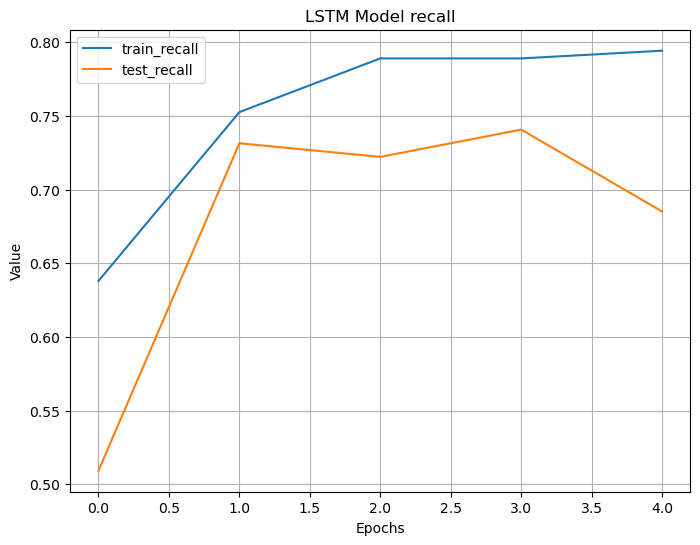

In [332]:
#Plotting LSTM model recall in train and test
plt.figure(figsize=(8,6))
plt.plot(history.history["recall_110"],label="train_recall")
plt.plot(history.history["val_recall_110"],label="test_recall")
plt.ylabel("Value")
plt.xlabel("Epochs")
plt.grid(True)
plt.legend()
plt.title("LSTM Model recall")
plt.show()

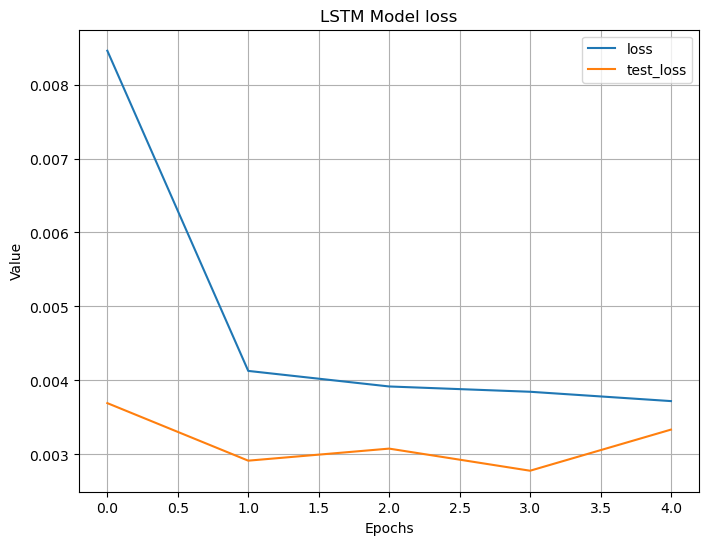

In [333]:
#Plotting LSTM model loss in train and test
plt.figure(figsize=(8,6))
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="test_loss")
plt.ylabel("Value")
plt.xlabel("Epochs")
plt.title("LSTM Model loss")
plt.grid(True)
plt.legend()
plt.show()

In [134]:
#Keras model to mnist dataset
(train_images,train_labels),(test_images,test_labels) = keras.datasets.mnist.load_data()
model_mnist = keras.models.Sequential()
model_mnist.add(keras.layers.Flatten(input_shape=[28,28]))
model_mnist.add(keras.layers.Dense(300,activation="relu"))
model_mnist.add(keras.layers.Dense(100,activation="relu"))
model_mnist.add(keras.layers.Dense(10,activation="softmax"))
model_mnist.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history_mninst = model_mnist.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4427 - accuracy: 0.8651 - val_loss: 0.4114 - val_accuracy: 0.8856
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2812 - accuracy: 0.9279 - val_loss: 0.2191 - val_accuracy: 0.9446
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1930 - accuracy: 0.9476 - val_loss: 0.1781 - val_accuracy: 0.9549
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1542 - accuracy: 0.9586 - val_loss: 0.1487 - val_accuracy: 0.9622
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1313 - accuracy: 0.9643 - val_loss: 0.1766 - val_accuracy: 0.9577
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1244 - accuracy: 0.9669 - val_loss: 0.1434 - val_accuracy: 0.9665
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1091 - accuracy: 0.9714 - val_loss: 0.1512 - val_accura

In [136]:
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28,28]))
    model.add(keras.layers.Dense(300,activation="relu"))
    model.add(keras.layers.Dense(100,activation="relu"))
    model.add(keras.layers.Dense(10,activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model

In [139]:
#Keras model to MNIST dataset with cross_validation
(train_images,train_labels),(test_images,test_labels) = keras.datasets.mnist.load_data()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
test_results = []
for train_index,val_index in kf.split(train_images):
    x_train,x_val = train_images[train_index],train_images[val_index]
    y_train,y_val = train_labels[train_index],train_labels[val_index]
    model = create_model()
    model.fit(x_train,y_train,epochs=5,validation_data=(x_val,y_val))
    test_loss,test_acc = model.evaluate(test_images,test_labels)
    test_results.append(test_acc)    
media_resultados = np.mean(test_results)
print(f"Test accuracy mean was {(media_resultados*100):.3f}%")

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 1.5851 - accuracy: 0.8579 - val_loss: 0.3425 - val_accuracy: 0.9117
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2766 - accuracy: 0.9276 - val_loss: 0.2419 - val_accuracy: 0.9369
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2002 - accuracy: 0.9454 - val_loss: 0.2562 - val_accuracy: 0.9323
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1662 - accuracy: 0.9546 - val_loss: 0.1855 - val_accuracy: 0.9553
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1637 - accuracy: 0.9601
Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6455 - accuracy: 0.8587 - val_loss: 0.3911 - val_accuracy: 0.8988
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3230 - accuracy: 0.9199 - val_loss: 0.3362 - val_accuracy: 0.9264
Epoch 3/5
1500/1500 [======================